### Image Classfication using Convolutional Neural Network
This project looks at a pre-installed and pre-cleaned dataset from the tensorflow package that include 50000 training images spanning classes of {'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}. The objective is to create a convolutional neural net that implements multi-class classification.

Data could be found via: https://www.cs.toronto.edu/~kriz/cifar.html

#### 1) Setting up environement and preprocess data

I am using tensorflow and keras to carry out most of the modelling and evaluating the results using sklearn.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

In [3]:
# Some configuration lines that allow tensorflow GPU to work properly
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

In [4]:
# Loading cifar10 dataset from tensorflow pre-installed datasets
# Load into separate training and testing datasets.
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
# Viewing the dimensions of the sets of features and labels
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_train: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_train: {y_test.shape}')

Shape of X_train: (50000, 32, 32, 3)
Shape of X_train: (10000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of y_train: (10000, 1)


In [6]:
# Normalising the RGB values.
X_train, X_test = X_train/255, X_test/255

In [7]:
# Reshaping the labels from 2D array into 1D
print('Before reshaping')
print(y_train[:5])
print(y_test[:5])
y_train, y_test = y_train.reshape(-1,), y_test.reshape(-1,)
print('After reshaping')
print(y_train[:5])
print(y_test[:5])

Before reshaping
[[6]
 [9]
 [9]
 [4]
 [1]]
[[3]
 [8]
 [8]
 [0]
 [6]]
After reshaping
[6 9 9 4 1]
[3 8 8 0 6]


In [8]:
# Use Counter to see if classes are balanced in the training and testing data
freq_train = Counter(y_train)
freq_test = Counter(y_test)
print(f'Training data distribution: {freq_train}')
print(f'Testing data distribution: {freq_test}')

Training data distribution: Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})
Testing data distribution: Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


In [9]:
# List of the labels 
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
# Define function that pots the image along with label
def plot_sample(X, y, index):
    plt.figure(figsize = (2,2))
    plt.imshow(X[index])
    plt.title(classes[y[index]])

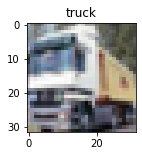

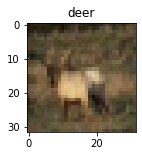

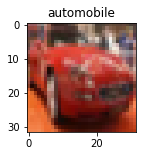

In [11]:
# Plot a few of the training images
plot_sample(X_train, y_train, 1)
plot_sample(X_train, y_train, 3)
plot_sample(X_train, y_train, 5)

#### 2) Artificial Neural Network

First, we attempted to build an artificial neural network with only dense layers to see how well is performs on our datasets. It turned out that accuracy is relatively low even with quite a few layers with a large number of neurons. This goes to show ANN alone is not well-suited for classifying 2D images.

Softmax is used at the output layer as it normalises the probability value. This is preferable compared to the sigmoid activation as the output classes in this dataset are mutually exclusive. This means we only care about the highest predicted probability so rescaling the probabilities should not vary our prediction. On the other hand, if we were intereted in multi-label classification (e.g. if we want to label a husky as 'husky', 'pet' and 'dog'), then we would care about the highest few probabilities. In that case, it is better to use sigmoid as it doesn't scale down any probabilities and we could pick labels of probabilities that reach a certain threshold.

Adam optimizer is used given its quick convergence rate due to a per-parameter learning rate approach. Sparse categorical crossentropy is used as the labels are encoded in values of 0-9 instead of one-hot encoding. Accuracy is used as the evaluation metric as the dataset CIFAR10 is well-cleaned and balanced between the different classes. This means accuracy could capture the preformance of the model effectively. 

In [12]:
# Initialise a sequential object
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),   # Flatten the feature values (32*32*3) into a flat vector of values
    layers.Dense(3000, activation='relu'),   # Relu activation for hidden layers
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')   # Softmax activation to normalise probability
])

In [13]:
# Compile the model with selected optimisation scheme, loss function adn evaluation metrics
ann.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [14]:
# Display a summary of the ANN model
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit the model to training data to train the parameters
ann.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 318us/sample - loss: 1.8831 - accuracy: 0.3285
Epoch 2/10
50000/50000 [==============================] - 14s 270us/sample - loss: 1.6507 - accuracy: 0.4083
Epoch 3/10
50000/50000 [==============================] - 14s 272us/sample - loss: 1.5658 - accuracy: 0.4398
Epoch 4/10
50000/50000 [==============================] - 14s 273us/sample - loss: 1.5218 - accuracy: 0.4558
Epoch 5/10
50000/50000 [==============================] - 14s 280us/sample - loss: 1.4911 - accuracy: 0.4667
Epoch 6/10
50000/50000 [==============================] - 14s 284us/sample - loss: 1.4577 - accuracy: 0.4798
Epoch 7/10
50000/50000 [==============================] - 15s 292us/sample - loss: 1.4325 - accuracy: 0.4865
Epoch 8/10
50000/50000 [==============================] - 15s 296us/sample - loss: 1.4033 - accuracy: 0.4985
Epoch 9/10
50000/50000 [==============================] - 16s 316us/sample - loss: 1.3884 - accuracy: 0.5

In [16]:
# Evaluate the performance of the model using the test set
test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print(f'Testing loss: {test_loss}')
print(f'Testing accuracy: {test_accuracy}')

10000/10000 [==============================] - 2s 189us/sample - loss: 1.4954 - accuracy: 0.4813
Testing loss: 1.49542753200531
Testing accuracy: 0.4812999963760376


In [17]:
# Make predictions for the testing dataset using the ANN model and evaluate its precision, recall and f1-score
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('ANN Classfication Report: \n', classification_report(y_test, y_pred_classes))

ANN Classfication Report: 
               precision    recall  f1-score   support

           0       0.65      0.44      0.52      1000
           1       0.66      0.53      0.59      1000
           2       0.39      0.33      0.36      1000
           3       0.34      0.28      0.31      1000
           4       0.43      0.38      0.40      1000
           5       0.33      0.52      0.41      1000
           6       0.42      0.72      0.53      1000
           7       0.61      0.49      0.55      1000
           8       0.59      0.65      0.62      1000
           9       0.60      0.47      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



<BarContainer object of 10 artists>

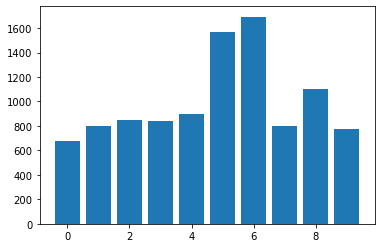

In [18]:
# Plot the predicted frequency of each class
pred_freq = Counter(y_pred_classes)
plt.bar(pred_freq.keys(), pred_freq.values())

For a small number of epochs of 10, it is shown that precision, recall and f1-score for all ten classes remain relatively low. This is because ANN is unable to pick up local features and patterns such as edges, shapes colours within the 2D images as all the RGB values are flattened into a long vector. Feature extraction requires specific kernels be applied locally to extract finer information within the 2D image domain. This could only be done using convolutional layers

#### 3) Convolutional Neural Network

For image classification problems, it is best to use convolutional neural network for better feature extraction. The training data would first go through layers of convolution layers where each layer captures information of the images in different order of details from edges to shapes to larger objects.

Using convolution with pooling allows location-invariant feature detection as the pooling process reduces the dimension of the feature domain allowing convolution te depcit larger features no matter the position of the obejct. Pooling also reduces the issue of overfitting so the model generalises well to the testing data.

The first Conv2D+MaxPooling2D layer uses 32 filters of kernel size (3,3) to pick up simple features like sharp/smooth edges and colour changes. The size ensures fine-grain changes could be captured. Max pooling then compresses the features for a second Conv2D+MaxPooling2D layer. This time round, 64 filters allow more specific components to be depicted such as shapes like vehicle wheels, animal tails, background patterns etc. After feature extraction, the model then feeds into a dense layers for classfication purposes.

In [19]:
# Initialise a sequantial object
cnn = models.Sequential([
    # First layer of convolution plus max pooling
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=([32,32,3])),
    layers.MaxPooling2D(pool_size=(2,2)),   
    # Second layer of convolution plus max pooling        
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # Flatten then dense layers             
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Softmax activation to normalise probability
])

In [20]:
# Compile the model with selected optimisation scheme, loss function adn evaluation metrics
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
# Display a summary of the CNN model
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
# Fit the model to training data to train the parameters
cnn.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 300us/sample - loss: 1.4646 - accuracy: 0.4743
Epoch 2/10
50000/50000 [==============================] - 8s 166us/sample - loss: 1.1148 - accuracy: 0.6097 - loss: 1.1154 - accuracy: 0.
Epoch 3/10
50000/50000 [==============================] - 8s 163us/sample - loss: 0.9884 - accuracy: 0.6570
Epoch 4/10
50000/50000 [==============================] - 8s 166us/sample - loss: 0.9064 - accuracy: 0.6846
Epoch 5/10
50000/50000 [==============================] - 9s 170us/sample - loss: 0.8419 - accuracy: 0.7070
Epoch 6/10
50000/50000 [==============================] - 8s 166us/sample - loss: 0.7946 - accuracy: 0.7228
Epoch 7/10
50000/50000 [==============================] - 10s 196us/sample - loss: 0.7500 - accuracy: 0.7396
Epoch 8/10
11008/50000 [=====>........................] - ETA: 7s - loss: 0.6662 - accuracy: 0.7617

In [ ]:
# Evaluate the performance of the model using the test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print(f'Testing loss: {test_loss}')
print(f'Testing accuracy: {test_accuracy}')

In [ ]:
# Make predictions for the testing dataset using the ANN model and evaluate its precision, recall and f1-score
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classfication Report: \n', classification_report(y_test, y_pred_classes))

In [ ]:
# Plot the predicted frequency of each class
pred_freq = Counter(y_pred_classes)
plt.bar(pred_freq.keys(), pred_freq.values())

It is clear from the classification report that the evaluation metrics have imporved tremenedously using a CNN with the same number of epochs. Given that we are trying to perform multi-class classfication of 10 classes with a modest dataset of 50000 training images of pixel resolution 32by32 times 3(RGB intensities), our model with only small amount of fine-tuning and epochs have preformed relatively well.

#### 4) Future work

After this brief project, we could next look at a more complex dataset CIFAR-100 dataset (provided at the same link as this dataset). That project will be more complex as it entails classfication for 100 classes including superclass and subclasses (essentially a multi-label problem).